# **_MODELO DE `M`ACHINE `L`EARNING CON `K-MEANS`_**

## _Análisis exploratorio de datos `EDA`_

In [1]:
# Importamos librerias a necesitar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [2]:
# Importamos los datos con los que se van a trabjar
df = pd.read_csv('ML\csv_para_ML.csv')
df.head()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_6648\1997599705.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\PERSONAL\Desktop\Data scince\HENRY\HENRY - Data scince\LABS\LABS 3 GRUPAL\alertas_sismicas\ML\csv_para_ML.csv')


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Error 400: Bad Request
0,1950-12-30T16:08:51.880Z,36.480333,-117.956500,0.57,3.15,ml,4.0,176.0,0.3431,0.07,...,"16km SE of Lone Pine, CA",earthquake,2.30,1.40,0.182,12.0,reviewed,ci,ci,NaN
1,1950-12-30T03:48:09.120Z,33.941167,-116.472333,6.00,3.54,ml,7.0,287.0,0.6533,0.36,...,"4km SE of Desert Hot Springs, CA",earthquake,1.88,31.61,0.141,14.0,reviewed,ci,ci,NaN
2,1950-12-29T22:35:23.860Z,23.854000,91.844000,15.00,5.90,mw,NaN,NaN,NaN,NaN,...,"9 km S of ?mb?sa, India",earthquake,NaN,25.00,0.260,NaN,reviewed,iscgem,iscgem,NaN
3,1950-12-29T13:12:52.330Z,35.785833,-117.892500,8.55,2.43,ml,4.0,182.0,0.2417,0.21,...,"17km S of Little Lake, CA",earthquake,1.32,1.85,0.252,8.0,reviewed,ci,ci,NaN
4,1950-12-29T11:56:08.560Z,32.735000,87.974000,15.00,6.10,mw,NaN,NaN,NaN,NaN,...,western Xizang,earthquake,NaN,25.00,0.200,NaN,reviewed,iscgem,iscgem,NaN


In [3]:
# Creamos un nuevo dataframe que contiene las variables de interes para el modelo
for i in df:
    if i != 'depth' and i != 'mag' and i != 'rms':
        df = df.drop(i, axis=1)

df.head()

,depth,mag,rms
0,0.57,3.15,0.07
1,6.00,3.54,0.36
2,15.00,5.90,NaN
3,8.55,2.43,0.21
4,15.00,6.10,NaN


In [4]:
# Observamos si hay valores nulos, como tambien el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128743 entries, 0 to 128742
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   depth   128161 non-null  float64
 1   mag     128383 non-null  float64
 2   rms     90248 non-null   float64
dtypes: float64(3)
memory usage: 2.9 MB


Se puede observar que hay valores nulos en ciertas columnas, procedemos a eliminar los registros nulos

In [5]:
df = df.dropna()

In [6]:
# Observamos una descripcion estadistica de los datos
df.describe()

,depth,mag,rms
count,90248.000000,90248.000000,90248.000000
mean,7.623878,2.271107,0.179884
std,7.780233,0.691344,0.345608
min,-3.397000,1.000000,0.000000
25%,2.997000,1.800000,0.070000
50%,6.000000,2.200000,0.110000
75%,8.860000,2.670000,0.210000
max,120.335000,7.700000,41.960000


In [7]:
# Observamos con cuantos registros nos quedamos para cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90248 entries, 0 to 128382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   depth   90248 non-null  float64
 1   mag     90248 non-null  float64
 2   rms     90248 non-null  float64
dtypes: float64(3)
memory usage: 2.8 MB


### **_Graficas_**

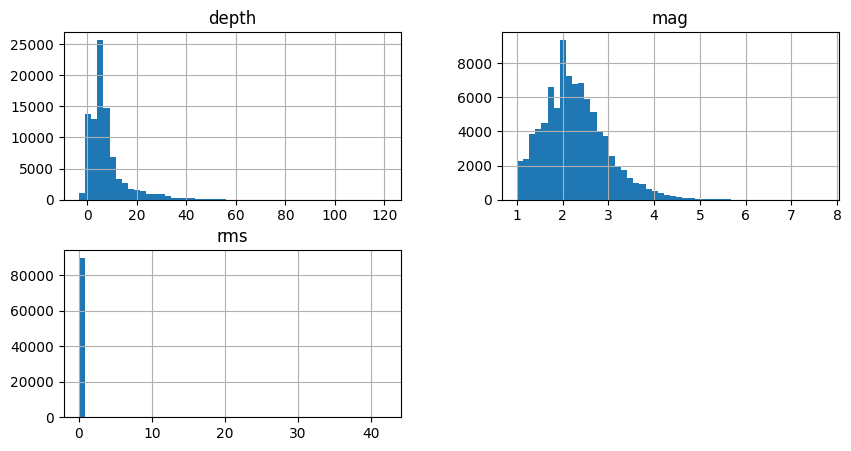

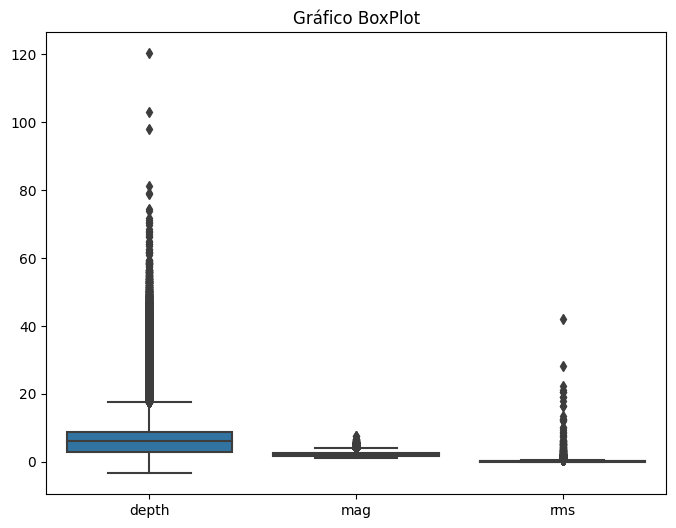

In [8]:
# Vemos la distribucion de los datos, para esto graficamos un histograma 
df.hist(bins = 50, figsize = (10,5))
plt.show()

# Tambien graficamos un BoxPlot para ver mejor los datos atipicos
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Gráfico BoxPlot')
plt.show()

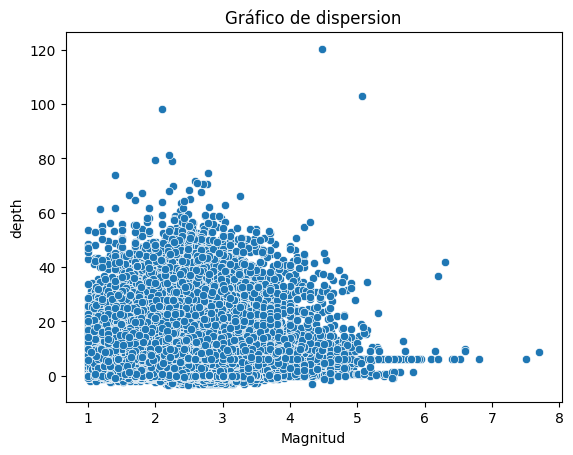

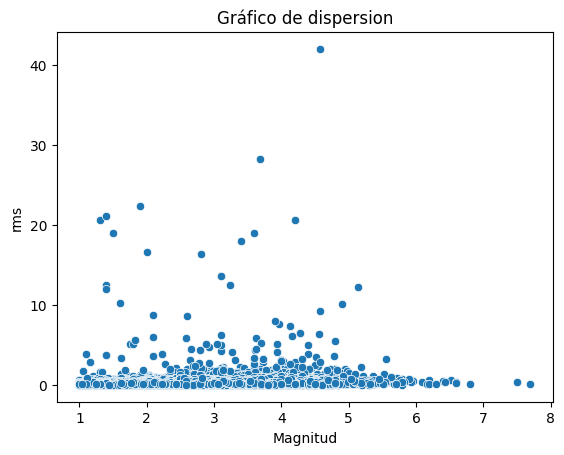

In [9]:
for i in df:
    if i != 'mag':
        
        # Se crean los graficos
        sns.scatterplot(data=df, x='mag', y=i)

        # Agregamos etiquetas y titulo a los graficos
        plt.xlabel('Magnitud')
        plt.ylabel(i)
        plt.title('Gráfico de dispersion')

        # Se muestran los graficos
        plt.show()

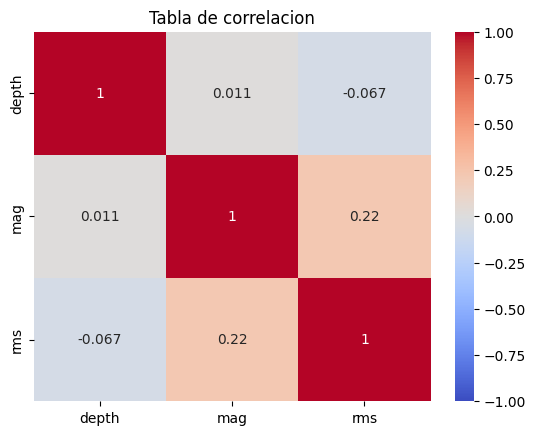

In [10]:
plt.title('Tabla de correlacion')
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0, annot=True, cmap="coolwarm")
plt.show()

## **_Evaluación de los datos con métodos de `K-Means`_**

In [11]:
# Importamos las librerias para implementar el modelo y sus respectivas evaluaciones
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [12]:
# Definimos una serie de datos con 20000 registros, ya que no se pudo trabajar con todos los datospor falta de recursos en la maquina
df = df.sample(n=20000, random_state=42, replace=True)
df

,depth,mag,rms
22818,0.353,2.00,0.39
1405,6.000,6.20,0.54
110126,4.800,1.64,0.22
78926,9.150,2.84,0.28
9749,3.333,3.04,0.21
...,...,...,...
104242,25.591,1.75,0.10
15515,32.523,2.32,0.12
1658,6.000,3.37,0.29
84830,0.483,3.54,0.07


Se implementa el codo de jambú para ver el clúster óptimo para los datos

In [ ]:
# Creamos una lista para que sean almacenado la suma de los cuadrado media 
sum_cuadrado_cluster = []

# Iteramos en el numero de cluster a testear
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    sum_cuadrado_cluster.append(kmeans.inertia_)

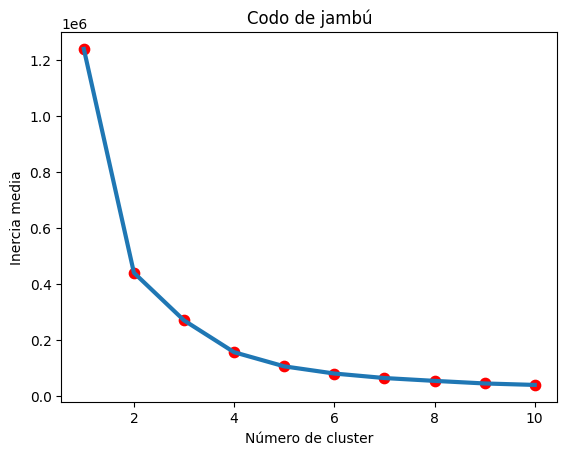

In [14]:
# Graficamos las distancias media en funcion del numero de cluster
plt.plot(range(1,11), sum_cuadrado_cluster, lw=3)
plt.scatter(range(1,11), sum_cuadrado_cluster,s=55,c='r')

# Personalizamos el grafico
plt.title('Codo de jambú')
plt.xlabel('Número de cluster')
plt.ylabel('Inercia media')

# Mostramos el grafico
plt.show()

La grafica nos dice que un clúster optimo es 2, pero aquí ya definimos los clúster de entrada que serán 3, solo estamos observando cómo se conforman estas medidas con respecto a nuestro clúster ya definido

In [ ]:
# Utilizamos la evaluacion de silhouette para posterioemente graficar 
silhouette_scores = []

# Iteramos en cada cluster definido
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

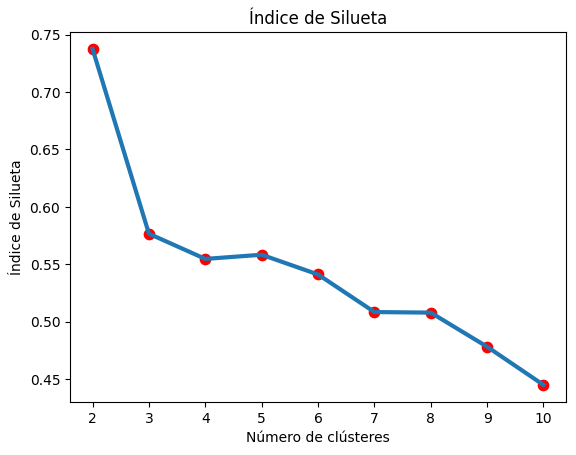

In [16]:
# Graficar el índice de silueta
plt.plot(range(2, 11), silhouette_scores, lw=3)
plt.scatter(range(2,11), silhouette_scores,s=55,c='r')

# Personalizamos el grafico
plt.xlabel('Número de clústeres')
plt.ylabel('Índice de Silueta')
plt.title('Índice de Silueta')

# Mostramos el grafico
plt.show()

## **_Aplicación del modelo `K-Means` a los datos_**

In [ ]:
# Instanciamos el modelo con numero de cluster 3
clustering = KMeans(n_clusters=3, random_state=0)

# Entrenamos
entrenado = clustering.fit(df)

In [18]:
# Obtenemos las etiquetas
df['Kmeans_clusters'] = clustering.labels_

In [19]:
# Evaluamos el modelo con la metrica silhouette
silhouette_avg = silhouette_score(df, cluster_labels)
print("Índice de Silueta:", silhouette_avg)


Índice de Silueta: 0.4294486638984337


A continuación, aplicamos la técnica de PCA para reducir a dos componentes el set de datos, esto con la finalidad de mostrar los datos clusterizados en una grafica

In [20]:
# Importamos de sklearn a PCA
from sklearn.decomposition import PCA

# Instanciamos el PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(df)

# Creamos dataframe con los dos componentes
pca_df_1 = pd.DataFrame(data= pca_df, columns= ['Componente_1', 'Componente_2'])

# Añadimos al dataframe de componentes las etiquetas obtenidas del modelo Kmeans de los datos anteriormente
pca_df_1['Kmeans_clusters'] = clustering.labels_

# Vemos dataframe de componentes con las etiquetas de cluster
pca_df_1

,Componente_1,Componente_2,Kmeans_clusters
0,-7.291880,-0.118536,0
1,-1.648364,3.202093,0
2,-2.852606,-0.231320,0
3,1.608984,-0.510801,2
4,-4.314780,0.740116,0
...,...,...,...
19995,17.961674,-0.032672,1
19996,24.882535,0.654870,1
19997,-1.652120,1.094115,0
19998,-7.158593,0.982356,0


Graficamos los componentes con los clusters respectivamente

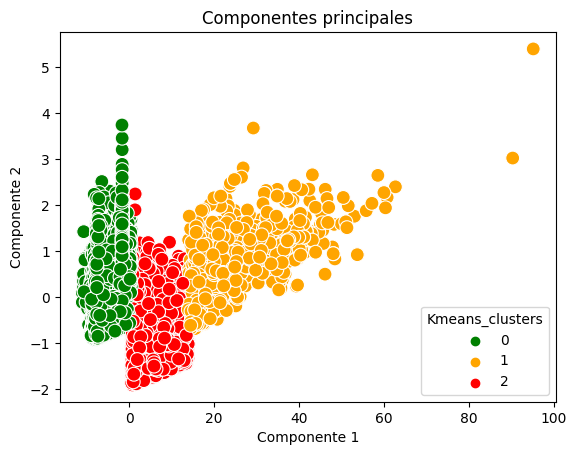

In [21]:
# Creamos una figura y un eje
fig, ax = plt.subplots()

# Asignamos los colores a las clasificaciones utilizando Seaborn
colores = {0: 'green', 1: 'orange', 2: 'red'}
sns.scatterplot(data=pca_df_1, x='Componente_1', y='Componente_2', hue='Kmeans_clusters', palette=colores, ax=ax, s=100)



# Personalizamos el gráfico
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_title('Componentes principales')

# Mostrar el gráfico
plt.show()


In [22]:
# Guardamos el modelo en un archivo pickel
with open('model_K-Means.pkl', 'wb') as en:
    pickle.dump(entrenado, en)